# BUSCANDO OS DADOS

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime

In [2]:
df_petra = pd.read_csv('C:/Users/leona/Documents/Untitled Folder/DADOS CSV/PETR4.csv')

In [3]:
df_petra.head(5)

Data Último Abertura Máxima Mínima     Vol.    Var%
0  31.08.2021  27,19    28,20  28,23  26,99  109,91M  -3,92%
1  30.08.2021  28,30    28,40  28,71  28,26   60,86M  -0,67%
2  27.08.2021  28,49    27,70  28,49  27,67   76,10M   3,64%
3  26.08.2021  27,49    27,58  27,88  27,47   40,64M  -0,87%
4  25.08.2021  27,73    27,63  27,83  27,38   45,93M   0,54%

In [4]:
df_petra = df_petra.rename(columns={'Último': 'Ultimo', 'Máxima':'Maxima', 'Mínima':'Minima', 'Vol.':'Volume', 'Var%':'Variacao_percentual'})

df_petra.head()

Data Ultimo Abertura Maxima Minima   Volume Variacao_percentual
0  31.08.2021  27,19    28,20  28,23  26,99  109,91M              -3,92%
1  30.08.2021  28,30    28,40  28,71  28,26   60,86M              -0,67%
2  27.08.2021  28,49    27,70  28,49  27,67   76,10M               3,64%
3  26.08.2021  27,49    27,58  27,88  27,47   40,64M              -0,87%
4  25.08.2021  27,73    27,63  27,83  27,38   45,93M               0,54%

In [5]:
df_petra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Data                 1648 non-null   object
 1   Ultimo               1648 non-null   object
 2   Abertura             1648 non-null   object
 3   Maxima               1648 non-null   object
 4   Minima               1648 non-null   object
 5   Volume               1648 non-null   object
 6   Variacao_percentual  1648 non-null   object
dtypes: object(7)
memory usage: 90.2+ KB


In [6]:
df_petra['Data'] = df_petra['Data'].astype(str)
df_petra['Ultimo'] = df_petra['Ultimo'].astype(str)
df_petra['Abertura'] = df_petra['Abertura'].astype(str)
df_petra['Maxima'] = df_petra['Maxima'].astype(str)
df_petra['Minima'] = df_petra['Minima'].astype(str)
df_petra['Volume'] = df_petra['Volume'].astype(str)
df_petra['Variacao_percentual'] = df_petra['Variacao_percentual'].astype(str)


In [7]:
df_petra['Ultimo'] = df_petra['Ultimo'].str.replace(',', '.')
df_petra['Abertura'] = df_petra['Abertura'].str.replace(',', '.')
df_petra['Maxima'] = df_petra['Maxima'].str.replace(',', '.')
df_petra['Minima'] = df_petra['Minima'].str.replace(',', '.')
df_petra['Volume'] = df_petra['Volume'].str.replace(',', '.')
df_petra['Variacao_percentual'] = df_petra['Variacao_percentual'].str.replace(',', '.')

In [8]:
df_petra['Data'] = df_petra['Data'].str.replace('.', '-')
df_petra['Variacao_percentual'] = df_petra['Variacao_percentual'].str.replace('%', '')
df_petra['Volume'] = df_petra['Volume'].str.replace('M', '')

C:\Users\leona\AppData\Local\Temp/ipykernel_18168/162647280.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_petra['Data'] = df_petra['Data'].str.replace('.', '-')


In [9]:
df_petra['Ultimo'] = pd.to_numeric(df_petra['Ultimo'],errors = 'coerce')
df_petra['Abertura'] = pd.to_numeric(df_petra['Abertura'],errors = 'coerce')
df_petra['Maxima'] = pd.to_numeric(df_petra['Maxima'],errors = 'coerce')
df_petra['Minima'] = pd.to_numeric(df_petra['Minima'],errors = 'coerce')
df_petra['Volume'] = pd.to_numeric(df_petra['Volume'],errors = 'coerce')
df_petra['Variacao_percentual'] = pd.to_numeric(df_petra['Variacao_percentual'],errors = 'coerce')

In [10]:
df_petra.head()

Data  Ultimo  Abertura  Maxima  Minima  Volume  Variacao_percentual
0  31-08-2021   27.19     28.20   28.23   26.99  109.91                -3.92
1  30-08-2021   28.30     28.40   28.71   28.26   60.86                -0.67
2  27-08-2021   28.49     27.70   28.49   27.67   76.10                 3.64
3  26-08-2021   27.49     27.58   27.88   27.47   40.64                -0.87
4  25-08-2021   27.73     27.63   27.83   27.38   45.93                 0.54

In [11]:
df_petra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data                 1648 non-null   object 
 1   Ultimo               1648 non-null   float64
 2   Abertura             1648 non-null   float64
 3   Maxima               1648 non-null   float64
 4   Minima               1648 non-null   float64
 5   Volume               1648 non-null   float64
 6   Variacao_percentual  1648 non-null   float64
dtypes: float64(6), object(1)
memory usage: 90.2+ KB


In [12]:
fig = go.Figure(data=[go.Candlestick(
                x=df_petra['Data'],
                open=df_petra['Abertura'],
                high=df_petra['Maxima'],
                low=df_petra['Minima'],
                close=df_petra['Ultimo'])])

fig.show()

### Como podemos observa a fonte do dataset (InfoMononey)  acaba abreviando o volume negociado, limitando uma possivél analise no futuro, como por exemplo, considerar o volume como fator de entrada após a confirmção  do padrão topo-duplo / fundo-duplo

# ALTERNATINA

#### Utilizar a Biblioteca pandas-datareader (ferramenta de web scraping), e buscas os dados no yahoo finance (https://finance.yahoo.com/)

In [13]:
import pandas_datareader.data as web

In [14]:
df = web.DataReader('PETR4.SA',data_source="yahoo",start='2015-01-01',end='2021-08-31')

In [15]:
df.head(5)

High   Low  Open  Close      Volume  Adj Close
Date                                                      
2015-01-02  9.99  9.35  9.99   9.36  49559500.0   7.057713
2015-01-05  9.19  8.53  9.14   8.56  78385100.0   6.454489
2015-01-06  8.83  8.04  8.71   8.28  84723300.0   6.243361
2015-01-07  8.73  8.36  8.56   8.67  85531000.0   6.537434
2015-01-08  9.39  8.74  8.79   9.23  83306300.0   6.959689

In [16]:
df.reset_index(level=0, inplace=True)


In [17]:
df.tail(5)

Date       High        Low       Open      Close       Volume  \
1651 2021-08-25  27.830000  27.379999  27.629999  27.730000   46031200.0   
1652 2021-08-26  27.879999  27.469999  27.580000  27.490000   41061300.0   
1653 2021-08-27  28.490000  27.670000  27.700001  28.490000   76465300.0   
1654 2021-08-30  28.709999  28.260000  28.400000  28.299999   61054000.0   
1655 2021-08-31  28.230000  26.990000  28.200001  27.190001  110574300.0   

      Adj Close  
1651  24.684864  
1652  24.471220  
1653  25.361406  
1654  25.192270  
1655  24.204165

In [18]:
fig = go.Figure(data=[go.Candlestick(
                x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

# ANÁLISE EXPLORATÓRIA DOS DADOS

### Análise do Ativo de PETR4 nos últimos 10 anos

### * Sobre o Conjunto de dados 

In [19]:
df = web.DataReader('PETR4.SA',data_source="yahoo",start='2011-01-01',end='2021-12-31')

In [20]:
fig = go.Figure(data=[go.Candlestick(
                x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

O conjunto de dados possui 6 colunas e o index é a data. Como se obeserva só é possível extrair a informação de diária do preço do ativo.

Significado de Coluna:
* High: Preço máximo atingido em uma unidade de  tempo
* Low: Preço mínimo atingido em uma unidade de tempo
* Open: Preço de abertura em uma unidade de tempo
* Close: Preço de fechamento em uma unidade de tempo
* Volume: Mede o número de ações de um ativo que são negociadas em uma bolsa de valores em um dia ou período de tempo.
* Adj Close: fechamento ajustado é o preço de fechamento após os ajustes para todas as divisões e distribuições de dividendos aplicáveis.

In [21]:
df.head(5)

High    Low       Open      Close      Volume  Adj Close
Date                                                                     
2011-01-03  27.580000  26.91  27.500000  27.000000  22738500.0  17.614803
2011-01-04  27.059999  26.40  27.010000  26.900000  30936600.0  17.549559
2011-01-05  27.350000  26.58  26.680000  27.219999  24306800.0  17.758329
2011-01-06  27.459999  27.01  27.200001  27.110001  24328800.0  17.686565
2011-01-07  27.180000  26.73  27.020000  26.730000  17453800.0  17.438652

Mesmo coletando os dados em um período de 10 anos, se observa que o arquivo não é tão pesado (149 KB) e também não possui muitas linhas

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2728 entries, 2011-01-03 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2728 non-null   float64
 1   Low        2728 non-null   float64
 2   Open       2728 non-null   float64
 3   Close      2728 non-null   float64
 4   Volume     2728 non-null   float64
 5   Adj Close  2728 non-null   float64
dtypes: float64(6)
memory usage: 149.2 KB


Analisando a distribuição dos dados, se certifica que são bem distribuidos (desvio padrao entorno de 6.3). Mas vemos que o Volume possui uma grande variação e contem alguns outliers.

In [23]:
df.describe()

High          Low         Open        Close        Volume  \
count  2728.000000  2728.000000  2728.000000  2728.000000  2.728000e+03   
mean     19.627106    19.042801    19.346511    19.321249  4.945242e+07   
std       6.323892     6.240424     6.284066     6.284036  3.573383e+07   
min       4.270000     4.120000     4.200000     4.200000  0.000000e+00   
25%      15.187500    14.700000    15.020000    14.967500  2.730618e+07   
50%      19.804999    19.250000    19.515000    19.520000  4.316010e+07   
75%      24.590000    23.882499    24.242500    24.222499  6.327562e+07   
max      31.760000    30.629999    31.459999    31.120001  6.989506e+08   

         Adj Close  
count  2728.000000  
mean     14.629765  
std       5.269593  
min       3.166922  
25%      11.114390  
50%      14.023177  
75%      18.288405  
max      29.690001

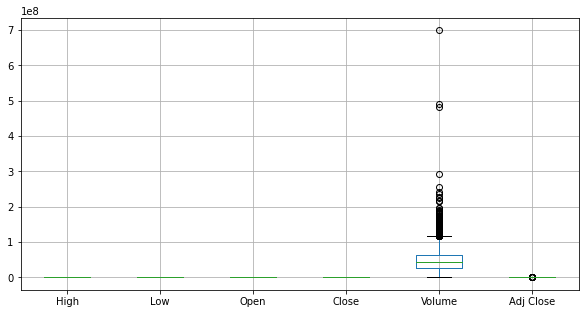

In [24]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

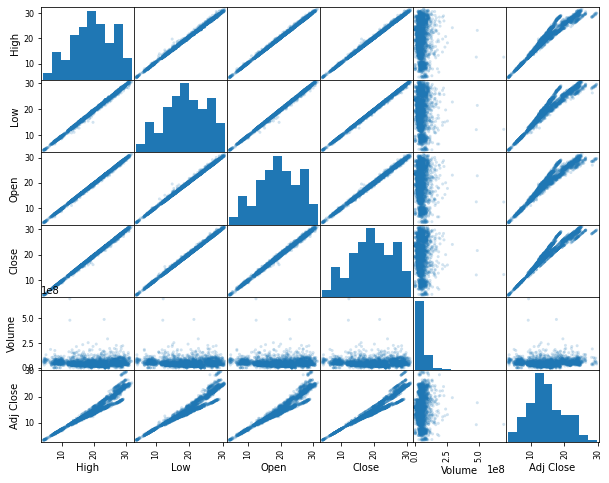

In [25]:
ax2 = pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(10,8))

Sobre a corelação se certifica que o unico que não possui nenhum relação com as demais características é o volume, o restante possui correlação muito forte.

* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

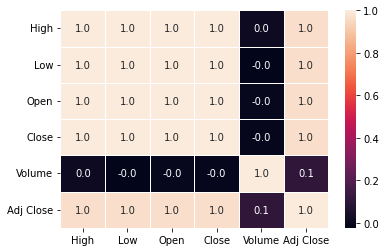

In [26]:
fig = sn.heatmap(df.corr(), annot = True, fmt=".1f", linewidths=.6)

### Análise do Ativo de VALE3 nos últimos 10 anos

In [27]:
df = web.DataReader('VALE3.SA',data_source="yahoo",start='2011-01-01',end='2021-12-31')

In [28]:
fig = go.Figure(data=[go.Candlestick(
                x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [29]:
df.describe()

High          Low         Open        Close        Volume  \
count  2728.000000  2728.000000  2728.000000  2728.000000  2.728000e+03   
mean     43.446606    42.264531    42.877698    42.842742  1.270362e+07   
std      22.027067    21.571279    21.822869    21.810794  1.291820e+07   
min       9.060000     8.600000     8.750000     8.600000  0.000000e+00   
25%      29.732500    28.980000    29.440001    29.325000  4.258525e+06   
50%      40.250000    39.040001    39.745001    39.670000  7.388200e+06   
75%      51.955001    50.740002    51.400002    51.315001  1.882745e+07   
max     120.449997   115.250000   119.800003   118.720001  1.835345e+08   

         Adj Close  
count  2728.000000  
mean     32.295369  
std      20.842481  
min       6.253836  
25%      20.089069  
50%      24.882191  
75%      39.602536  
max     106.261818

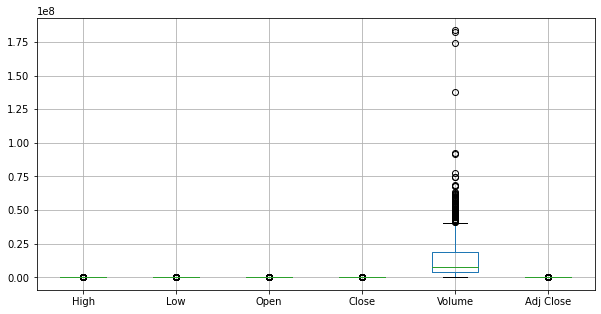

In [30]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

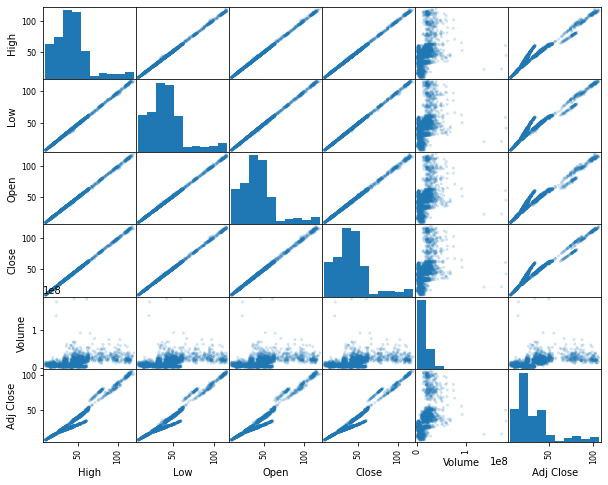

In [31]:
ax2 = pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(10,8))

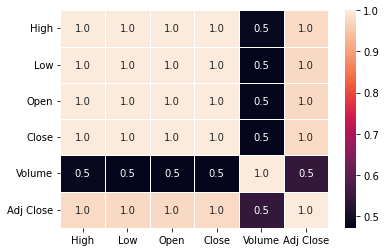

In [32]:
fig = sn.heatmap(df.corr(), annot = True, fmt=".1f", linewidths=.6)

### Análise do Ativo de ITUB4 nos últimos 10 anos

In [33]:
df = web.DataReader('ITUB4.SA',data_source="yahoo",start='2011-01-01',end='2021-12-31')

In [34]:
fig = go.Figure(data=[go.Candlestick(
                x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [35]:
df.describe()

High          Low         Open        Close        Volume  \
count  2728.000000  2728.000000  2728.000000  2728.000000  2.728000e+03   
mean     23.047878    22.453260    22.756986    22.748112  2.364221e+07   
std       7.288004     7.126949     7.211553     7.203246  1.313790e+07   
min      12.066571    11.451858    11.884434    11.633995  0.000000e+00   
25%      16.435580    16.020311    16.235624    16.227261  1.519972e+07   
50%      21.457850    20.881542    21.231667    21.196667  2.067467e+07   
75%      28.795000    28.170000    28.483333    28.474166  2.878764e+07   
max      39.790001    38.400002    38.669998    39.689999  1.116226e+08   

         Adj Close  
count  2728.000000  
mean     18.951872  
std       8.168470  
min       7.520495  
25%      11.129797  
50%      16.033998  
75%      26.149145  
max      35.758160

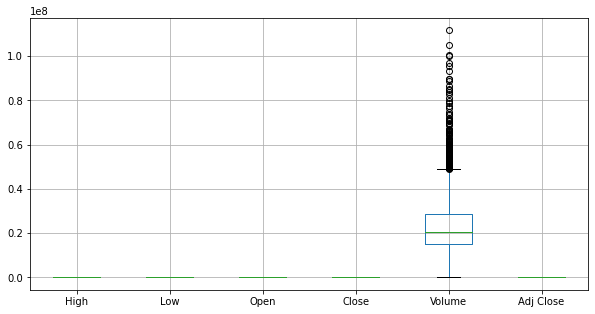

In [36]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

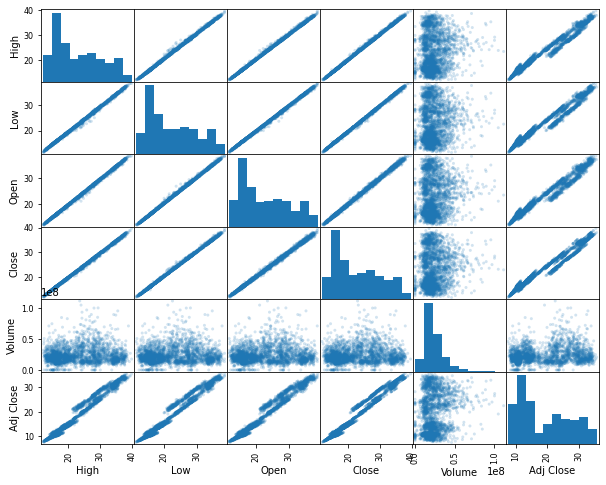

In [37]:
ax2 = pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(10,8))

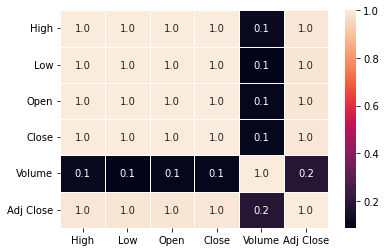

In [38]:
fig = sn.heatmap(df.corr(), annot = True, fmt=".1f", linewidths=.6)

### Análise do Ativo de BBDC4 nos últimos 10 anos

In [57]:
df = web.DataReader('BBDC4.SA',data_source="yahoo",start='2011-01-01',end='2021-12-31')

In [58]:
fig = go.Figure(data=[go.Candlestick(
                x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [59]:
df.describe()

High          Low         Open        Close        Volume  \
count  2728.000000  2728.000000  2728.000000  2728.000000  2.728000e+03   
mean     19.511243    18.986369    19.258737    19.252215  2.193547e+07   
std       6.132222     5.990595     6.071981     6.065133  1.552676e+07   
min       9.858160     9.636181     9.687407     9.681715  0.000000e+00   
25%      14.314608    13.977629    14.164012    14.157760  1.255892e+07   
50%      18.035349    17.508501    17.810756    17.836137  1.722509e+07   
75%      23.338635    22.741364    23.063637    23.018636  2.590619e+07   
max      36.309090    35.472729    36.000000    35.827271  1.493898e+08   

         Adj Close  
count  2728.000000  
mean     15.725291  
std       6.476986  
min       7.179049  
25%       9.841600  
50%      13.784393  
75%      20.431726  
max      31.719431

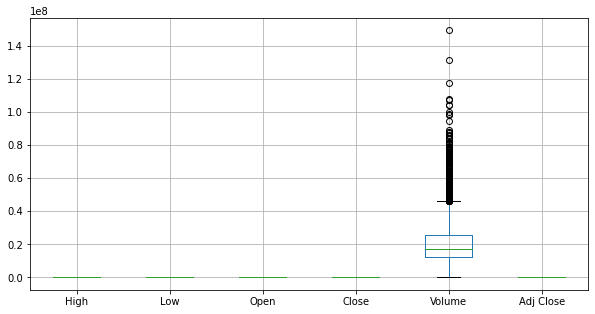

In [60]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

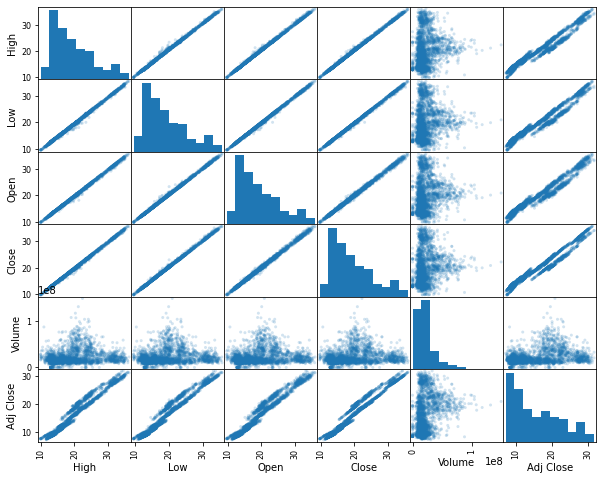

In [61]:
ax2 = pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(10,8))

AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

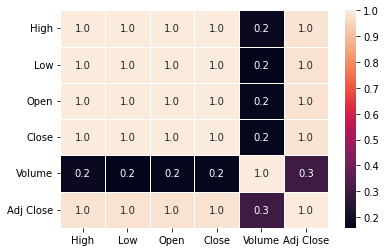

In [44]:
fig = sn.heatmap(df.corr(), annot = True, fmt=".1f", linewidths=.6)

### Análise do Ativo de BBAS3 nos últimos 10 anos

In [45]:
df = web.DataReader('BBAS3.SA',data_source="yahoo",start='2011-01-01',end='2021-12-31')

In [46]:
fig = go.Figure(data=[go.Candlestick(
                x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [47]:
df.describe()

High          Low         Open        Close        Volume  \
count  2728.000000  2728.000000  2728.000000  2728.000000  2.728000e+03   
mean     30.118732    29.213211    29.679223    29.655440  1.008414e+07   
std       9.022900     8.844332     8.947700     8.934094  8.367660e+06   
min      12.840000    12.520000    12.620000    12.700000  0.000000e+00   
25%      23.980000    23.250000    23.677500    23.625000  5.803925e+06   
50%      28.440001    27.610001    28.010000    28.054999  8.285000e+06   
75%      33.500000    32.612500    33.099998    33.070000  1.225008e+07   
max      55.910000    54.820000    55.599998    55.180000  2.272360e+08   

         Adj Close  
count  2728.000000  
mean     22.533034  
std       9.948163  
min       9.446795  
25%      14.281673  
50%      18.618316  
75%      29.283725  
max      48.002701

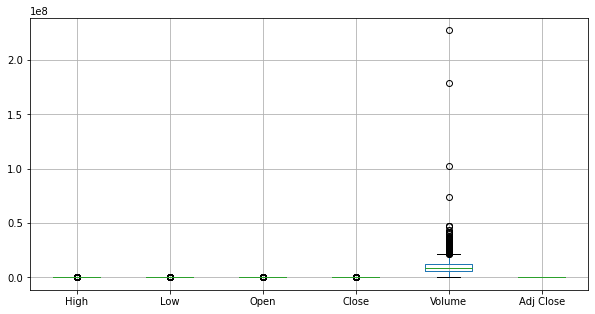

In [48]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

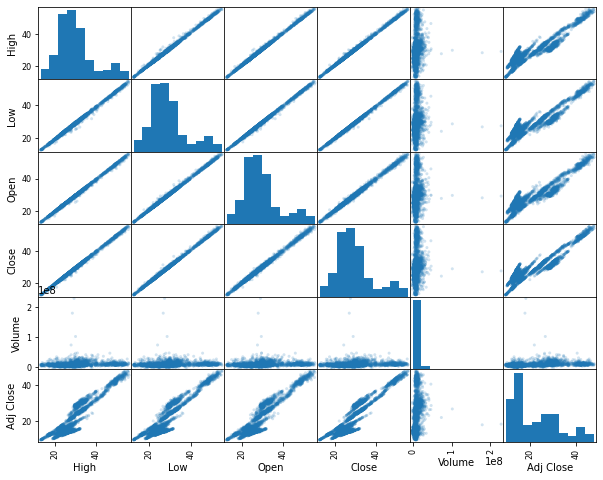

In [49]:
ax2 = pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(10,8))

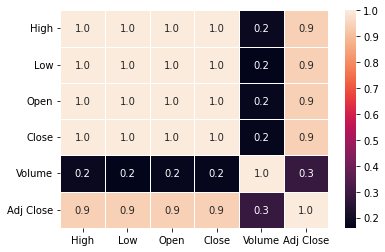

In [50]:
fig = sn.heatmap(df.corr(), annot = True, fmt=".1f", linewidths=.6)

### Análise do Ativo de ABEV3 nos últimos 10 anos

In [51]:
df = web.DataReader('ABEV3.SA',data_source="yahoo",start='2011-01-01',end='2021-12-31')

In [52]:
fig = go.Figure(data=[go.Candlestick(
                x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [53]:
df.describe()

High          Low         Open        Close        Volume  \
count  2728.000000  2728.000000  2728.000000  2728.000000  2.728000e+03   
mean     16.471889    16.094565    16.283759    16.287861  1.354232e+07   
std       3.496126     3.460181     3.478630     3.476740  1.437379e+07   
min       7.301804     7.096035     7.127999     7.127999  0.000000e+00   
25%      15.245000    14.805000    14.992500    15.007500  2.568860e+06   
50%      17.155421    16.776228    16.993217    16.967219  1.148655e+07   
75%      18.879999    18.469999    18.672500    18.670000  1.878022e+07   
max      24.559999    24.030001    24.389999    24.270000  2.876952e+08   

         Adj Close  
count  2728.000000  
mean     13.556069  
std       3.637979  
min       4.783694  
25%      11.797607  
50%      14.650879  
75%      16.099272  
max      21.439585

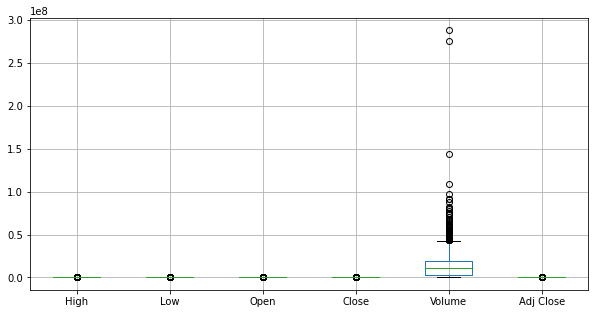

In [54]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

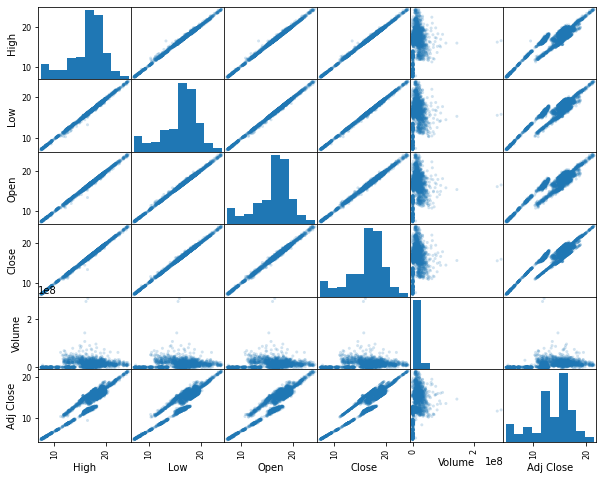

In [55]:
ax2 = pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(10,8))

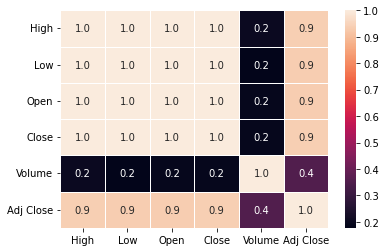

In [56]:
fig = sn.heatmap(df.corr(), annot = True, fmt=".1f", linewidths=.6)

### Conclusão

A partir análise exploratória dos dados se conclui que o problema em questão não trata-se de Big data, pois mesmo buscando os dados em um período de 10 anos o volume ainda é muito baixo (entorno de 150 KB). Como os dados vem uma da API pandas_datareader eles já vem no formato adquado para a modelagem, não havendo necessidade de alteração no tipo dos dados. Por fim, pode se notar que para os 6 ativos escolhido no estudo a análise dos dados e os gráficos é praticamente o mesmaa, podendo assim geralizarmos a analise explorátoria dos dados para todos os ativos do estudo.